In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [8]:
df = pd.read_csv("Churn_Modelling.csv")
df.loc[1,:]

RowNumber                  2
CustomerId          15647311
Surname                 Hill
CreditScore              608
Geography              Spain
Gender                Female
Age                       41
Tenure                     1
Balance             83807.86
NumOfProducts              1
HasCrCard                  0
IsActiveMember             1
EstimatedSalary    112542.58
Exited                     0
Name: 1, dtype: object

In [12]:
df = df.drop("RowNumber", axis = 1)
df = df.drop("CustomerId", axis = 1)
df = df.drop("Surname", axis = 1)
df.loc[1,:]

CreditScore              608
Geography              Spain
Gender                Female
Age                       41
Tenure                     1
Balance             83807.86
NumOfProducts              1
HasCrCard                  0
IsActiveMember             1
EstimatedSalary    112542.58
Exited                     0
Name: 1, dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [15]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [18]:
df[df.duplicated()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


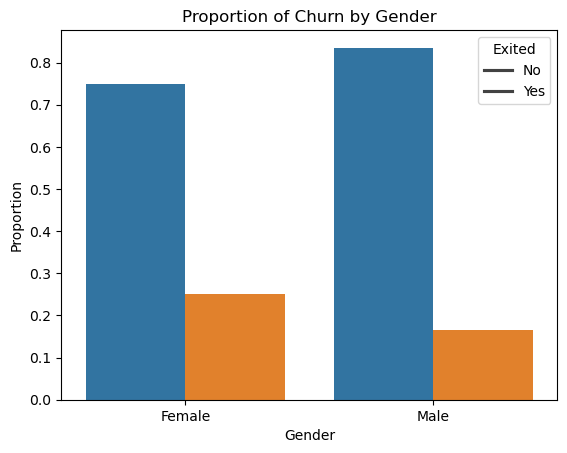

In [21]:
# Calculate proportion of Exited within each Gender
prop_df = df.groupby('Gender')['Exited'].value_counts(normalize=True).rename('Proportion').reset_index()

sns.barplot(data=prop_df, x='Gender', y='Proportion', hue='Exited')
plt.title('Proportion of Churn by Gender')
plt.ylabel('Proportion')
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.show()

Roughly 25% of women, and 16% of male customers churned.

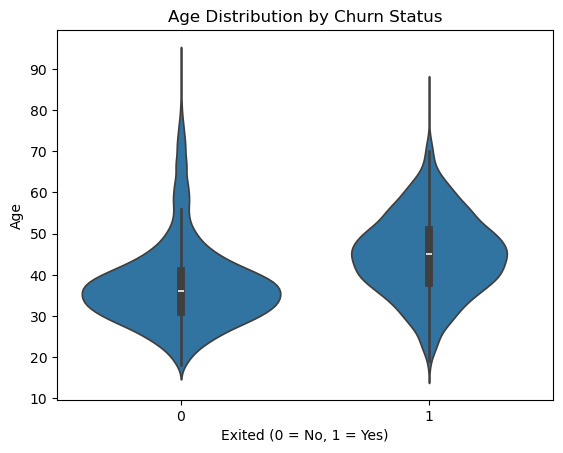

In [25]:
sns.violinplot(data=df, x='Exited', y='Age')
plt.title('Age Distribution by Churn Status')
plt.xlabel('Exited (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

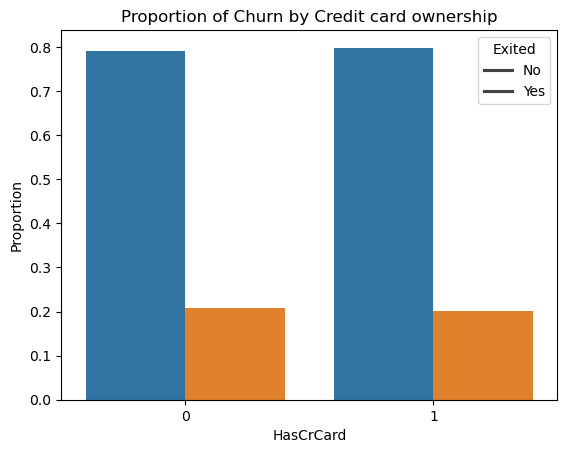

In [27]:
# Calculate proportion of Exited within each Gender
prop_df = df.groupby('HasCrCard')['Exited'].value_counts(normalize=True).rename('Proportion').reset_index()

sns.barplot(data=prop_df, x='HasCrCard', y='Proportion', hue='Exited')
plt.title('Proportion of Churn by Credit card ownership')
plt.ylabel('Proportion')
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.show()

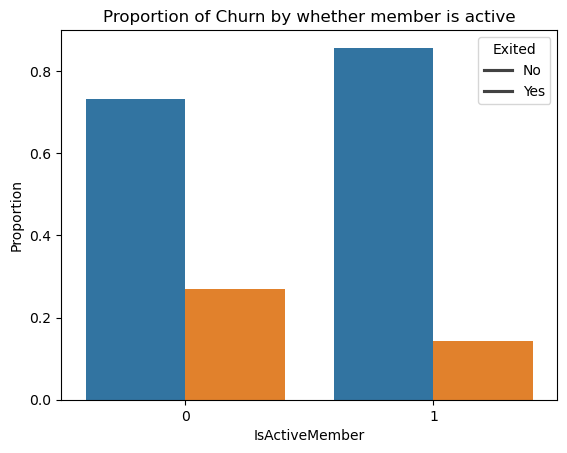

In [39]:
prop_df = df.groupby('IsActiveMember')['Exited'].value_counts(normalize=True).rename('Proportion').reset_index()

sns.barplot(data=prop_df, x='IsActiveMember', y='Proportion', hue='Exited')
plt.title('Proportion of Churn by whether member is active')
plt.ylabel('Proportion')
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.show()

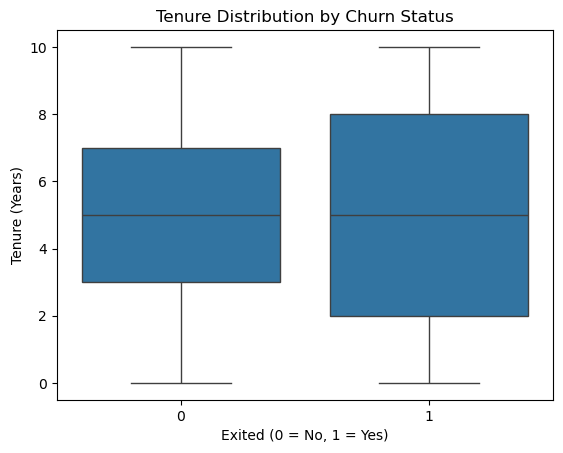

In [31]:
sns.boxplot(data=df, x='Exited', y='Tenure')
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Exited (0 = No, 1 = Yes)')
plt.ylabel('Tenure (Years)')
plt.show()

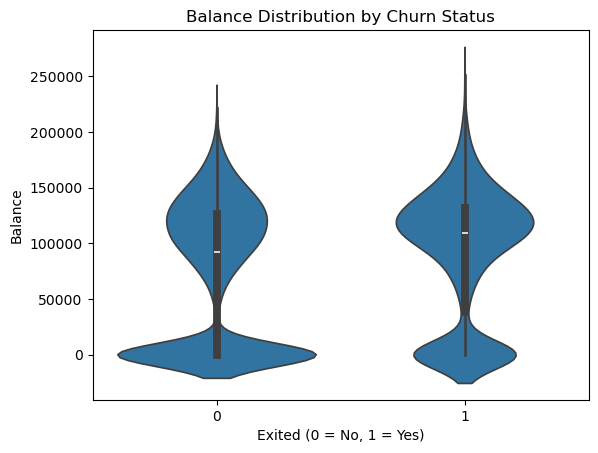

In [33]:
sns.violinplot(data=df, x='Exited', y='Balance')
plt.title('Balance Distribution by Churn Status')
plt.xlabel('Exited (0 = No, 1 = Yes)')
plt.ylabel('Balance')
plt.show()

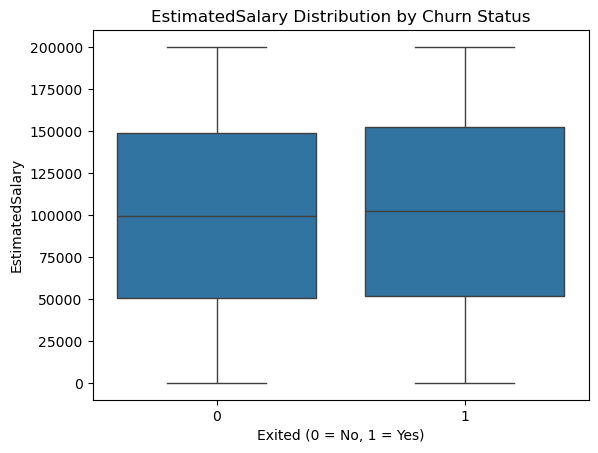

In [35]:
sns.boxplot(data=df, x='Exited', y='EstimatedSalary')
plt.title('EstimatedSalary Distribution by Churn Status')
plt.xlabel('Exited (0 = No, 1 = Yes)')
plt.ylabel('EstimatedSalary')
plt.show()

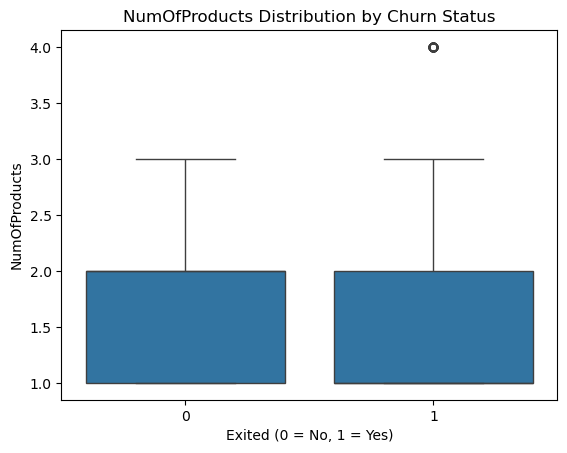

In [36]:
sns.boxplot(data=df, x='Exited', y='NumOfProducts')
plt.title('NumOfProducts Distribution by Churn Status')
plt.xlabel('Exited (0 = No, 1 = Yes)')
plt.ylabel('NumOfProducts')
plt.show()

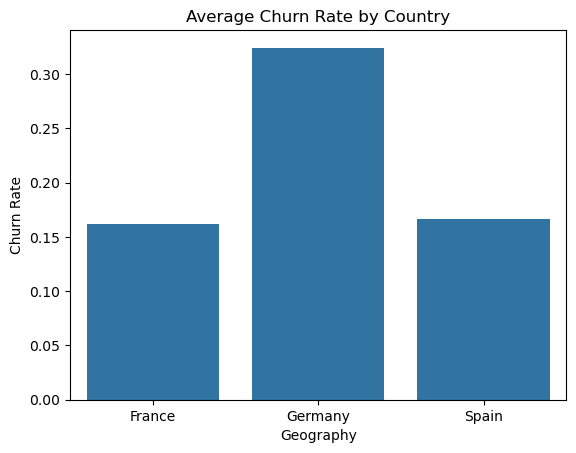

In [45]:
churn_by_country = df.groupby('Geography')['Exited'].mean().reset_index()

sns.barplot(data=churn_by_country, x='Geography', y='Exited')
plt.title('Average Churn Rate by Country')
plt.xlabel('Geography')
plt.ylabel('Churn Rate')
plt.show()

Based on the plots, I'll assume that the following features will have the strongest effect on predicting churn: Age, Gender, whether the person is an active member (routinely uses the service or not), Geography, and (maybe) Tenure.

In [50]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender']) #(Female = 0, Male = 1)
df = pd.get_dummies(df, columns = ['Geography'], drop_first = True)

In [51]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [58]:
features = list(df.drop('Exited', axis = 1).columns)
X = df[features]
y = df['Exited']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [64]:
y_pred = model.predict(X_test)

In [65]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [68]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64

In [69]:
print(conf_matrix)
print(class_report)
print(accuracy)

[[1551   56]
 [ 211  182]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

0.8665


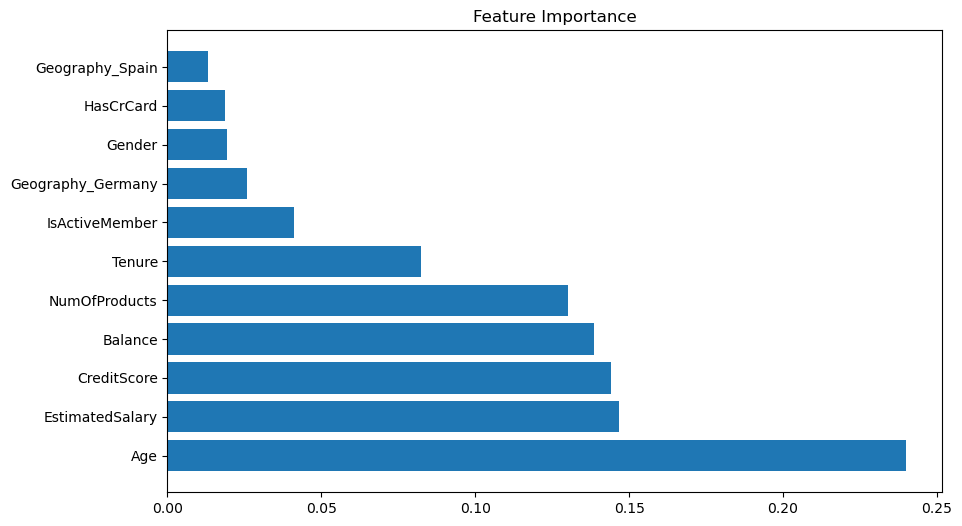

In [71]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [features[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.barh(range(X.shape[1]), importances[indices])
plt.yticks(range(X.shape[1]), names)
plt.show()

Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression

# Build and train model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print(conf_matrix_log_reg, class_report_log_reg, accuracy_log_reg)

[[1543   64]
 [ 314   79]]               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000
 0.811


SVM

In [83]:
from sklearn.svm import SVC

# Build and train model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(conf_matrix_svm, class_report_svm, accuracy_svm)

[[1607    0]
 [ 393    0]]               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000
 0.8035


/network/rit/misc/software/jupyterhub/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/network/rit/misc/software/jupyterhub/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/network/rit/misc/software/jupyterhub/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [84]:
from sklearn.neighbors import KNeighborsClassifier

# Build and train model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(conf_matrix_knn, class_report_knn, accuracy_knn)

[[1514   93]
 [ 247  146]]               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.61      0.37      0.46       393

    accuracy                           0.83      2000
   macro avg       0.74      0.66      0.68      2000
weighted avg       0.81      0.83      0.81      2000
 0.83


In [85]:
from sklearn.ensemble import GradientBoostingClassifier

# Build and train model
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_model.fit(X_train, y_train)

# Make predictions
y_pred_gbm = gbm_model.predict(X_test)

# Evaluate the model
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
class_report_gbm = classification_report(y_test, y_pred_gbm)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)

print(conf_matrix_gbm, class_report_gbm, accuracy_gbm)

[[1543   64]
 [ 201  192]]               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000
 0.8675


Try some feature engineering

In [86]:
df = pd.read_csv("Churn_Modelling.csv")

# Binary feature for balance
df['BalanceZero'] = (df['Balance'] == 0).astype(int)

# Age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65, 75, 85, 95], labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95'])

# Balance to salary ratio
df['BalanceToSalaryRatio'] = df['Balance'] / df['EstimatedSalary']

# Interaction feature between NumOfProducts and IsActiveMember
df['ProductUsage'] = df['NumOfProducts'] * df['EstimatedSalary']

# Tenure grouping
df['TenureGroup']= pd.cut(df['Tenure'], bins=[0, 2, 5, 7, 10], labels = ['0-2', '3-5', '6-7', '8-10'])

In [87]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender']) #(Female = 0, Male = 1)
df = pd.get_dummies(df, columns = ['Geography'], drop_first = True)
df['MaleGermany'] = df['Gender'] * df['Geography_Germany']
df['MaleSpain'] = df['Gender']* df['Geography_Spain']

In [89]:
df = pd.get_dummies(df, columns = ['AgeGroup', 'TenureGroup'], drop_first=True)

In [90]:
df = df.drop("RowNumber", axis = 1)
df = df.drop("CustomerId", axis = 1)
df = df.drop("Surname", axis = 1)

In [92]:
features = list(df.drop('Exited', axis = 1).columns)

X = df[features]
y = df['Exited']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [96]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(conf_matrix, class_report, accuracy)

[[1544   63]
 [ 213  180]]               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000
 0.862


The model behaves consistently across a range of engineered features. However, the feature engineering step did not significantly impact overall model performance.